In [126]:
#!pip install kagglehub
import kagglehub
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/healthcare-dataset-stroke-data.csv')

#Load dataset here


Path to dataset files: /home/emre/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1


**Basic data exploration**

Here we view basic info about the data. 

In [127]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [129]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [130]:
#Lets check for missing values
print("Missing values in the data:\n ",df.isnull().sum())

Missing values in the data:
  id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**Missing data handling**

Here we see that a lot of values are missing from the bmi feature. There are many ways to achieve hadnling these values but here we thought a simple imputer that takes the mean of the values is fitting. 

In [131]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

print("Missing values in the data after imputation:\n ",df.isnull().sum())

Missing values in the data after imputation:
  id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [132]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

**Data Distribution**

Here we can see some of the data distributions #consider changing

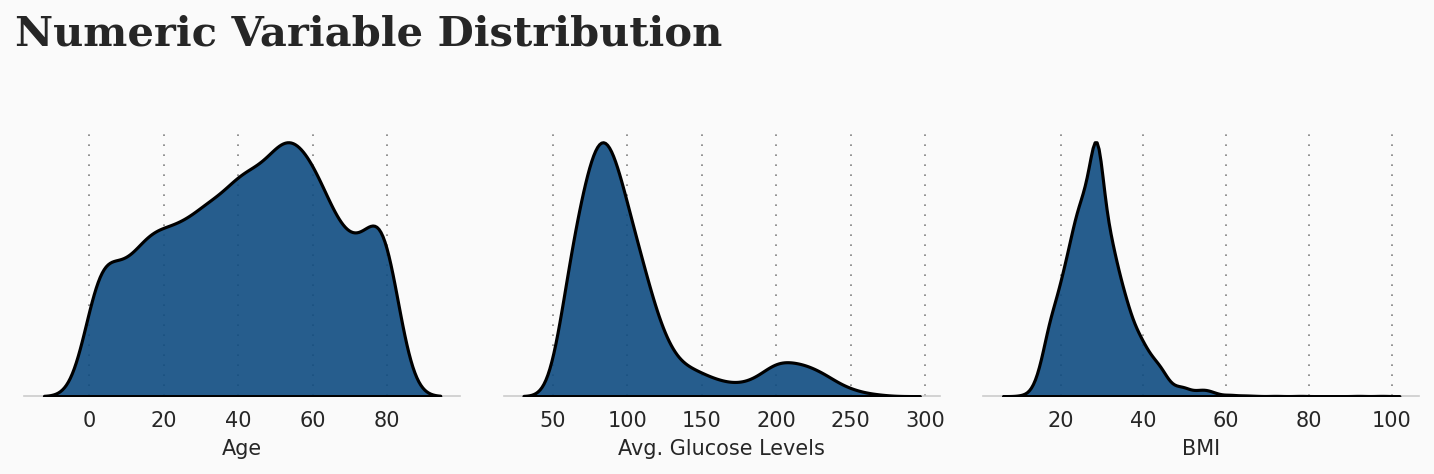

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

axs = []

for row in range(0, 1):
    for col in range(0, 3):
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor(background_color)
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            ax.spines[s].set_visible(False)
        axs.append(ax) 

for ax, variable in zip(axs, conts):
    sns.kdeplot(df[variable], ax=ax, color='#0f4c81', fill=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))

axs[0].set_xlabel('Age')
axs[1].set_xlabel('Avg. Glucose Levels')
axs[2].set_xlabel('BMI')

axs[0].text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

We see a positive skew in Glucose and BMI levels.


**Preparing the data**

Here we start preparing the data. We write down categoricals into a list and then we One-Hot Encode them. 

In [134]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("New Columns:", df.columns.tolist())
df.head()

New Columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


**Correlation with stroke**


The Pearson correlation coefficients identify Age ($\rho \approx 0.25$) as the dominant predictor of stroke susceptibility. A secondary cluster of physiological indicators, including Heart Disease, Average Glucose Level, and Hypertension, exhibits moderate positive associations (approx. $0.13$).Conversely, BMI ($0.04$) and demographic variables such as Gender and Residence Type display negligible linear correlations, suggesting they are weak standalone predictors in this model. The attribute work_type_children presents the strongest negative correlation ($-0.08$), reflecting the inverse relationship between youth and stroke incidence.

In [135]:
#Check correlation of all columns with 'stroke'
correlation = df.corr()['stroke'].sort_values(ascending=False)

# Drop the 'stroke' row itself and print
print(correlation.drop('stroke'))


age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
id                                0.006388
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
work_type_children               -0.083869
Name: stroke, dtype: float64


**Test train split**

Now we are preparing our data to finally train a model with. 


In [136]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['id','stroke','work_type_Private','work_type_Self-employed','Residence_type_Urban','gender_Other','work_type_children'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)


**Null accuracy** 

Null Accuracy represents the baseline performance achievable by a model that exclusively predicts the majority class (in this case, "No Stroke"). Given the dataset's significant class imbalance where approximately 95% of individuals are healthy a naive model predicting "No Stroke" for every instance would achieve a Null Accuracy of 95.1%.

This metric serves as the critical "floor" for evaluation; any predictive model must surpass this threshold to demonstrate true learning. A model achieving 95% accuracy is statistically equivalent to a dummy classifier that fails to identify a single positive stroke case.

In [137]:

null_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f'Null Accuracy: {null_accuracy:.4f}')

#Null accuracy shows us that if we always predict the majority class, we will be correct about 95.1% of the time.


Null Accuracy: 0.9511


**Class Imbalance**

Biggest problem with this dataset is that it is severely imbalanced. Below we have a graph that shows just how imbalanced it is.

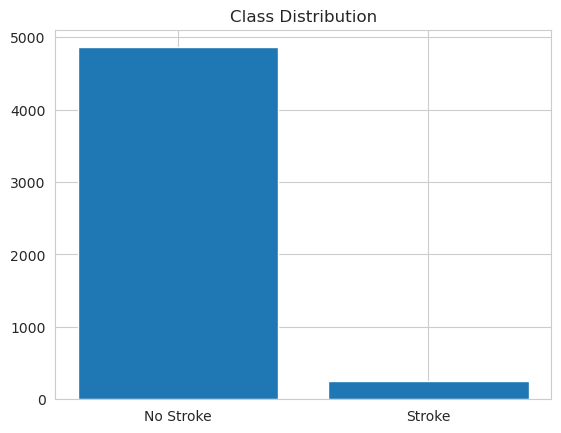

In [138]:
import matplotlib.pyplot as plt
count = df['stroke'].value_counts()
plt.bar(['No Stroke', 'Stroke'], count.values)
plt.title('Class Distribution')
plt.show()

We see that we have a huge gap between our classes. Oversampling in this case worked really poorly. So we are going to try couple methods. Starting with random undersampling. And then we will try to fix the class imbalance with SMOTE.

In [139]:

def importance_section(pipeline, X_train):
    from imblearn.pipeline import Pipeline
    # ---------------------------------------------------------
    # 3. FEATURE IMPORTANCE SECTION
    # ---------------------------------------------------------

    # Extract the Random Forest model from the pipeline
    rf_model = pipeline.named_steps['rf']

    # Get importance scores
    importances = rf_model.feature_importances_

    # Get column names
    # (If X_train is a numpy array from scaling, this might fail. 
    #  In that case, we need a separate list of column names.)                          
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        # Fallback if you used scaling (which turns data into arrays)
        feature_names = [f"Feature {i}" for i in range(len(importances))]
        print("Warning: X_train is a numpy array, specific column names are lost.")
    # Create a DataFrame for plotting
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
    plt.title('Which Features Predict Stroke Best?')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

In [140]:
def rus_pipeline(report=False):
    from imblearn.pipeline import Pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    pipeline = Pipeline([
        ('rus', RandomUnderSampler(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    if report == False:
        return recall_score(y_test, y_pred), precision_score(y_test, y_pred),accuracy_score(y_test, y_pred)
    
    elif report == True:
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
        plt.title("Random Forest + RUS")
        plt.show()
        
        
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\nClassification Report:\n", classification_report(y_test, y_pred))


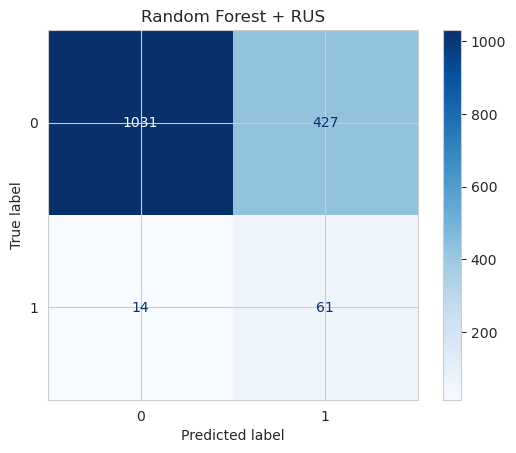

Accuracy: 0.7123

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.82      1458
           1       0.12      0.81      0.22        75

    accuracy                           0.71      1533
   macro avg       0.56      0.76      0.52      1533
weighted avg       0.94      0.71      0.79      1533



In [141]:
rus_pipeline(True)

**Random Under Sampling**

Here we have our first results. Judging by our confusion matrix our model sucessfully classified 1031 healthy people (True Negatives). But we have 427 false positives. The patients that the model called high risk of stroke were fine. And then the False Negatives are the most dangerous ones. In this case if this algorithm was to be used in real life it would let 14 people who are in the risky area without any alarms. And 61 people were correctly classified. 

In [142]:
def rus_cross_val(k=5, report=True):
    import matplotlib.pyplot as plt
    from imblearn.pipeline import Pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict 
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

    global X_train, y_train 

    pipeline = Pipeline([
        ('rus', RandomUnderSampler(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv, n_jobs=-1)

    if report == False:
        return recall_score(y_train, y_pred_cv), precision_score(y_train, y_pred_cv),accuracy_score(y_train, y_pred_cv)

    if report == True:
        print(f"Running {k}-Fold Cross-Validation on X_train...")
        scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['recall', 'precision', 'f1', 'accuracy'], n_jobs=-1)
        
        print(f"\n--- Cross-Validation Results (Average of {k} runs) ---")
        print(f"Recall (Sensitivity): {scores['test_recall'].mean():.2%} (+/- {scores['test_recall'].std():.2%})")
        print(f"Precision:            {scores['test_precision'].mean():.2%}")
        print(f"F1 Score:             {scores['test_f1'].mean():.2%}")
        print(f"Accuracy:             {scores['test_accuracy'].mean():.2%}")
        print("-" * 60)

        print("\nCombined Classification Report (All Folds):")
        print(classification_report(y_train, y_pred_cv))
        print(f"Combined Accuracy: {accuracy_score(y_train, y_pred_cv):.4f}")
        
        ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv, cmap='Blues')
        plt.title(f"Cross-Validated Confusion Matrix ({k} Folds)")
        plt.show()


In [143]:
rus_cross_val(k=5,report=False)

(0.8333333333333334, 0.1320582877959927, 0.7254682694995807)

In [144]:
def rus_xgboost_pipeline(report=True):
    import matplotlib.pyplot as plt
    from imblearn.pipeline import Pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

    global X_train, y_train, X_test, y_test

    pipeline = Pipeline([
        ('rus', RandomUnderSampler(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')) 
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    if report == False:
        return recall_score(y_test, y_pred), precision_score(y_test, y_pred),accuracy_score(y_test, y_pred)

    if report == True:
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
        plt.title("XGBoost + Random UnderSampling")
        plt.show()
        
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

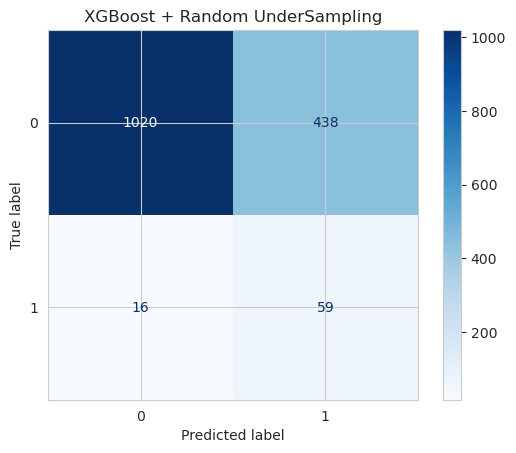


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      1458
           1       0.12      0.79      0.21        75

    accuracy                           0.70      1533
   macro avg       0.55      0.74      0.51      1533
weighted avg       0.94      0.70      0.79      1533

Accuracy: 0.7038


In [145]:
rus_xgboost_pipeline()

In [146]:
def rus_logreg_cross_val(k=5, report=True):
    import matplotlib.pyplot as plt
    from imblearn.pipeline import Pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

    global X_train, y_train

    pipeline = Pipeline([
        ('rus', RandomUnderSampler(random_state=42)),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000)) 
    ])
    
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv, n_jobs=-1)

    if report == False:
        return recall_score(y_train, y_pred_cv), precision_score(y_train, y_pred_cv),accuracy_score(y_train, y_pred_cv)

    if report == True:
        print(f"Running {k}-Fold Cross-Validation (Logistic Regression)...")
        scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['recall', 'precision', 'f1', 'accuracy'], n_jobs=-1)
        
        print(f"\n--- Cross-Validation Results (Average of {k} runs) ---")
        print(f"Recall (Sensitivity): {scores['test_recall'].mean():.2%} (+/- {scores['test_recall'].std():.2%})")
        print(f"Precision:            {scores['test_precision'].mean():.2%}")
        print(f"F1 Score:             {scores['test_f1'].mean():.2%}")
        print(f"Accuracy:             {scores['test_accuracy'].mean():.2%}")
        print("-" * 60)

        print("\nCombined Classification Report (All Folds):")
        print(classification_report(y_train, y_pred_cv))
        print(f"Combined Accuracy: {accuracy_score(y_train, y_pred_cv):.4f}")
        
        ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv, cmap='Blues')
        plt.title(f"Logistic Regression CV Matrix ({k} Folds)")
        plt.show()

Running 5-Fold Cross-Validation (Logistic Regression)...

--- Cross-Validation Results (Average of 5 runs) ---
Recall (Sensitivity): 78.17% (+/- 8.57%)
Precision:            13.33%
F1 Score:             22.76%
Accuracy:             74.20%
------------------------------------------------------------

Combined Classification Report (All Folds):
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3403
           1       0.13      0.78      0.23       174

    accuracy                           0.74      3577
   macro avg       0.56      0.76      0.54      3577
weighted avg       0.94      0.74      0.82      3577

Combined Accuracy: 0.7420


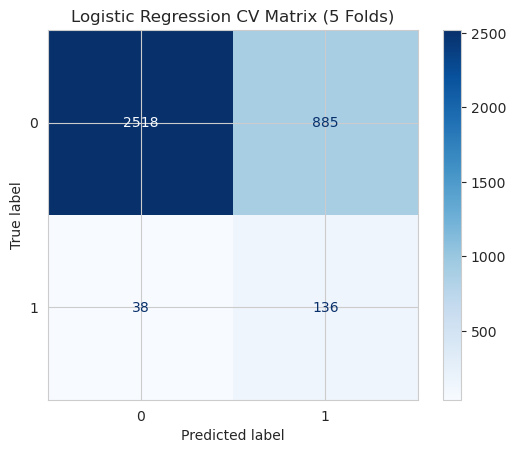

In [147]:
rus_logreg_cross_val(k=5)

In [148]:
def tuned_threshold_xgboost(report=True):
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    global X_train, y_train, X_test, y_test

    count_healthy = (y_train == 0).sum()
    count_stroke = (y_train == 1).sum()
    ratio = count_healthy / count_stroke
    
    model = XGBClassifier(scale_pos_weight=ratio, random_state=42, eval_metric='logloss', max_depth=3)
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    
    new_threshold = 0.10
    y_pred_new = (y_proba >= new_threshold).astype(int)

    if report == False:
        return recall_score(y_test, y_pred_new), precision_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new)

    if report == True:
        print(f"--- Results with Threshold {new_threshold} ---")
        print(classification_report(y_test, y_pred_new))
        print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
        
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new, cmap='Reds')
        plt.title(f"XGBoost (Threshold {new_threshold})")
        plt.show()

--- Results with Threshold 0.1 ---
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1458
           1       0.10      0.79      0.18        75

    accuracy                           0.65      1533
   macro avg       0.54      0.72      0.48      1533
weighted avg       0.94      0.65      0.75      1533

Accuracy: 0.6549


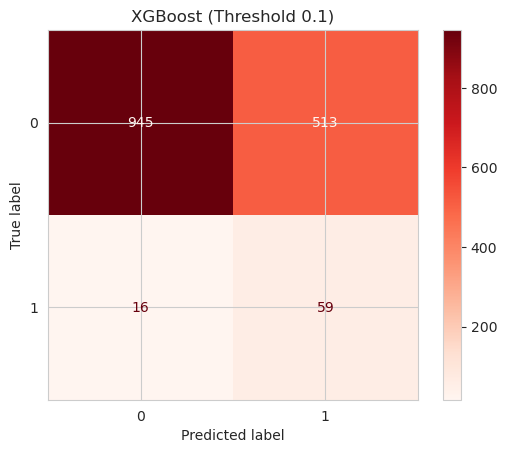

In [149]:
tuned_threshold_xgboost()

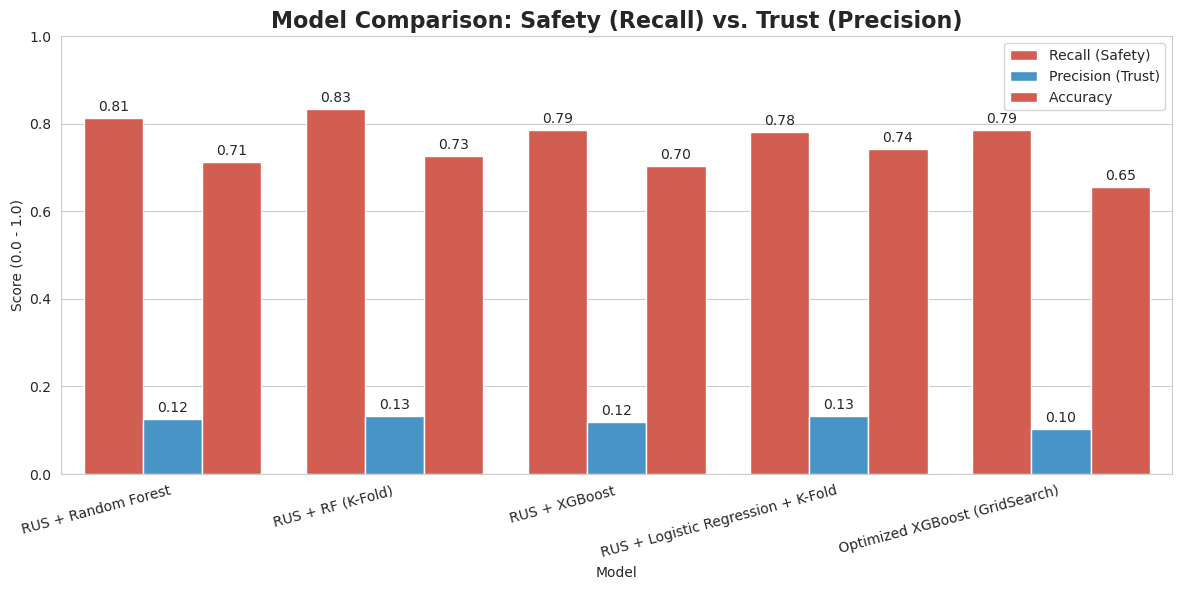

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. GET THE DYNAMIC VALUES
# rus_pipeline returns (recall, precision) -> This works fine
rus_recall, rus_precision,rus_acc = rus_pipeline(False)
rus_kfold_recall, rus_kfold_precision,rus_cross_acc = rus_cross_val(k=5, report=False)
rus_xgboost_recall, rus_xgboost_precision,rus_xg_acc = rus_xgboost_pipeline(report=False)
rus_logreg_recall,rus_logreg_precision,rus_log_acc = rus_logreg_cross_val(k=5, report=False)
tuned_xg_recall,tuned_xg_precision,tuned_xg_acc = tuned_threshold_xgboost(False)

# 2. CREATE THE DATAFRAME
# I added the missing numbers to the 'Recall' list below
data = {
    'Model': [
        'RUS + Random Forest', 
        'RUS + RF (K-Fold)', 
        'RUS + XGBoost', 
        'RUS + Logistic Regression + K-Fold',
        'Optimized XGBoost (GridSearch)' 
    ],
    'Recall (Safety)': [
        rus_recall, 
        rus_kfold_recall, 
        rus_xgboost_recall,  # <--- Added missing value
        rus_logreg_recall,  # <--- Added missing value
        tuned_xg_recall   # <--- Added missing value
    ], 
    'Precision (Trust)': [
        rus_precision, 
        rus_kfold_precision, 
        rus_xgboost_precision, 
        rus_logreg_precision, 
        tuned_xg_precision
    ], 
    'Accuracy': [
        rus_acc,
        rus_cross_acc,
        rus_xg_acc,
        rus_log_acc,
        tuned_xg_acc  
    ]
}


df = pd.DataFrame(data)
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plot = sns.barplot(
    data=df_melted, 
    x='Model', 
    y='Score', 
    hue='Metric', 
    palette=['#e74c3c', '#3498db'] 
)

plt.title('Model Comparison: Safety (Recall) vs. Trust (Precision)', fontsize=16, fontweight='bold')
plt.ylim(0, 1.0)
plt.ylabel('Score (0.0 - 1.0)')
plt.xticks(rotation=15, ha='right') # Added ha='right' to align tilted text
plt.legend(title=None, loc='upper right')

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()




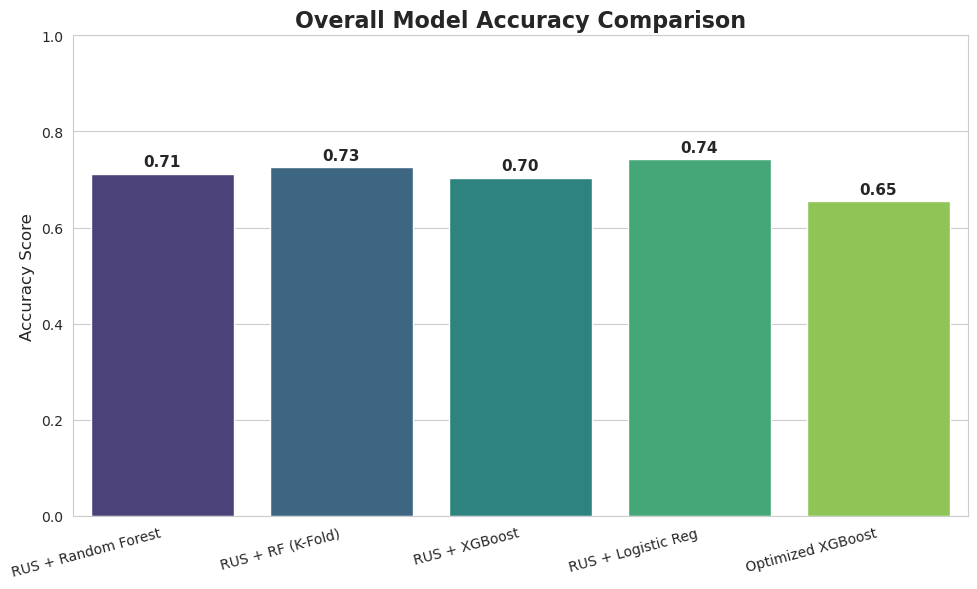

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': [
        'RUS + Random Forest', 
        'RUS + RF (K-Fold)', 
        'RUS + XGBoost', 
        'RUS + Logistic Reg',
        'Optimized XGBoost' 
    ],
    'Accuracy': [
        rus_acc,
        rus_cross_acc,
        rus_xg_acc,
        rus_log_acc,
        tuned_xg_acc  
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plot = sns.barplot(
    data=df, 
    x='Model', 
    y='Accuracy', 
    palette='viridis' # or 'Greens_d'
)

plt.title('Overall Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylim(0, 1.0) # Accuracy is always 0 to 1
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=15, ha='right')

# 5. Add exact numbers on top of bars
for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()